WeatherPy Analysis

As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth. There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness. There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

Note

Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
# Import API key
from config import api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint
import json
import csv

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [3]:
params = {"appid": api_key}

In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
cities_df = pd.DataFrame()
cities_df['lats'] = np.random.uniform(low=-90.000, high=90.000, size=1500)
cities_df['lngs'] = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(cities_df['lats'], cities_df['lngs'])
cities_df['City'] = ""
cities_df['Country'] = ""



In [6]:
for index, row in cities_df.iterrows():
    lat = row['lats']
    lng = row['lngs']
    cities_df.set_value(index, 'City', citipy.nearest_city(lat, lng).city_name)
    cities_df.set_value(index, 'Country', citipy.nearest_city(lat, lng).country_code)
    

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [7]:
cities_df.head()

,lats,lngs,City,Country
0,-39.131227,-68.952505,neuquen,ar
1,-28.118276,93.919140,carnarvon,au
2,32.333678,-69.163244,hamilton,bm
3,-23.984254,89.475952,bengkulu,id
4,-18.097607,-98.541730,puerto ayora,ec


### Convert Raw Data to DataFrame

Export the city data into a .csv.
Display the DataFrame

In [8]:
cities_df = cities_df.drop_duplicates(subset='City').reset_index()
cities_df.count()

index      612
lats       612
lngs       612
City       612
Country    612
dtype: int64

In [9]:
cities_df['City']

0                neuquen
1              carnarvon
2               hamilton
3               bengkulu
4           puerto ayora
5                mataura
6            barentsburg
7                 samusu
8                batagay
9        lazaro cardenas
10            port hardy
11            nanortalik
12           mys shmidta
13               husavik
14            georgetown
15                hobart
16              ucluelet
17                 tangi
18        ribeira grande
19         san cristobal
20             salgueiro
21                hasaki
22            nikolskoye
23               ushuaia
24                 airai
25         mount gambier
26               kahului
27             busselton
28             mahebourg
29            ereymentau
             ...        
582             monrovia
583             luderitz
584               maceio
585          antofagasta
586             xuanzhou
587                 gizo
588            fonte boa
589               elbeuf
590              ypsonas


In [10]:
city_list = cities_df['City'].tolist()
city_list

['neuquen',
 'carnarvon',
 'hamilton',
 'bengkulu',
 'puerto ayora',
 'mataura',
 'barentsburg',
 'samusu',
 'batagay',
 'lazaro cardenas',
 'port hardy',
 'nanortalik',
 'mys shmidta',
 'husavik',
 'georgetown',
 'hobart',
 'ucluelet',
 'tangi',
 'ribeira grande',
 'san cristobal',
 'salgueiro',
 'hasaki',
 'nikolskoye',
 'ushuaia',
 'airai',
 'mount gambier',
 'kahului',
 'busselton',
 'mahebourg',
 'ereymentau',
 'upernavik',
 'port hedland',
 'atuona',
 'east london',
 'punta arenas',
 'bambous virieux',
 'albany',
 'tura',
 'tuatapere',
 'bredasdorp',
 'tuktoyaktuk',
 'vila',
 'taltal',
 'cape town',
 'creel',
 'blagodatnoye',
 'norman wells',
 'saint-pierre',
 'zhigansk',
 'andarab',
 'vaini',
 'hermanus',
 'taolanaro',
 'port elizabeth',
 'hualmay',
 'karratha',
 'bireun',
 'zambezi',
 'kodiak',
 'kapaa',
 'sola',
 'cherskiy',
 'rikitea',
 'pisco',
 'faanui',
 'mar del plata',
 'gat',
 'gurgan',
 'salym',
 'avarua',
 'bluff',
 'rawson',
 'sisimiut',
 'port alfred',
 'cidreira',


### Perform API Calls

In [ ]:
#print(json.dumps(city_data, indent = 4, sort_keys=True)

In [11]:
# column_names = ["City",  
#                 "Country",
#                 "Temperature",
#                 "Latitude",
#                 "Longitude",
#                 "Humidity",
#                 "Cloudiness",
#                 "Wind Speed",
#                 "Date"
#                ]
new_cities_df = pd.DataFrame()

row_count = 1

print("Beginning Data Retrieval")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=imperial" + "&q=" + target_city
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("City not found, skipping...")

    else:
        new_cities_df.set_value(index, "City", city_data["name"])
        new_cities_df.set_value(index, "Country", city_data["sys"]["country"])
        new_cities_df.set_value(index, "Temperature", city_data["main"]["temp"])
        new_cities_df.set_value(index, "Latitude", city_data["coord"]["lat"])
        new_cities_df.set_value(index, "Longitude", city_data["coord"]["lon"])
        new_cities_df.set_value(index, "Humidity", city_data["main"]["humidity"])
        new_cities_df.set_value(index, "Cloudiness", city_data["clouds"]["all"])
        new_cities_df.set_value(index, "Wind Speed", city_data["wind"]["speed"])
        new_cities_df.set_value(index, "Date", city_data['dt'])
        
        print("------------------------")
        print("Proceesing: City # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1    
    
    

Beginning Data Retrieval


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/lib/python3.7/site-packages/ipykernel_l

------------------------
Proceesing: City #  1  |  Neuquen AR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=neuquen
------------------------
Proceesing: City #  2  |  Carnarvon ZA
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=carnarvon
------------------------
Proceesing: City #  3  |  Hamilton CA
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=hamilton
City not found, skipping...
------------------------
Proceesing: City #  4  |  Puerto Ayora EC
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=puerto ayora
------------------------
Proceesing: City #  5  |  Mataura NZ
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=mataura
City not found, skipping...
City not found, skipping...
------------------------
Proceesing

------------------------
Proceesing: City #  47  |  Hermanus ZA
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=hermanus
City not found, skipping...
------------------------
Proceesing: City #  48  |  Port Elizabeth US
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=port elizabeth
------------------------
Proceesing: City #  49  |  Hualmay PE
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=hualmay
------------------------
Proceesing: City #  50  |  Karratha AU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=karratha
------------------------
Proceesing: City #  51  |  Bireun ID
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=bireun
------------------------
Proceesing: City #  52  |  Zambezi ZM
http://api.openweatherm

------------------------
Proceesing: City #  94  |  Casa Nova BR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=casa nova
------------------------
Proceesing: City #  95  |  Souillac FR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=souillac
------------------------
Proceesing: City #  96  |  Bethel US
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=bethel
City not found, skipping...
------------------------
Proceesing: City #  97  |  Port Lincoln AU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=port lincoln
City not found, skipping...
------------------------
Proceesing: City #  98  |  Port Moresby PG
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=port moresby
------------------------
Proceesing: City #  99  |

------------------------
Proceesing: City #  139  |  Guerrero Negro MX
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=guerrero negro
------------------------
Proceesing: City #  140  |  Flinders AU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=flinders
------------------------
Proceesing: City #  141  |  San Quintin PH
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=san quintin
------------------------
Proceesing: City #  142  |  Dubrovnik HR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=dubrovnik
------------------------
Proceesing: City #  143  |  Tasiilaq GL
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=tasiilaq
------------------------
Proceesing: City #  144  |  Dhidhdhoo MV
http://api.openweathermap.org

------------------------
Proceesing: City #  185  |  Muravlenko RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=muravlenko
------------------------
Proceesing: City #  186  |  Lagoa PT
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=lagoa
------------------------
Proceesing: City #  187  |  Kupang ID
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=kupang
------------------------
Proceesing: City #  188  |  Cabo San Lucas MX
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=cabo san lucas
------------------------
Proceesing: City #  189  |  Leningradskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=leningradskiy
------------------------
Proceesing: City #  190  |  Bouna CI
http://api.openweathermap.org/data/2.

------------------------
Proceesing: City #  230  |  Kalinin TJ
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=kalinin
------------------------
Proceesing: City #  231  |  Arraial do Cabo BR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=arraial do cabo
------------------------
Proceesing: City #  232  |  Khatanga RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=khatanga
------------------------
Proceesing: City #  233  |  Culleredo ES
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=culleredo
------------------------
Proceesing: City #  234  |  Moron VE
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=moron
------------------------
Proceesing: City #  235  |  Goderich CA
http://api.openweathermap.org/data/2.5/wea

------------------------
Proceesing: City #  276  |  Hirara JP
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=hirara
------------------------
Proceesing: City #  277  |  Mehamn NO
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=mehamn
------------------------
Proceesing: City #  278  |  Ayan TR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=ayan
------------------------
Proceesing: City #  279  |  Eyl SO
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=eyl
------------------------
Proceesing: City #  280  |  Quatre Cocos MU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=quatre cocos
------------------------
Proceesing: City #  281  |  Pitea SE
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea

------------------------
Proceesing: City #  322  |  Kirakira SB
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=kirakira
City not found, skipping...
------------------------
Proceesing: City #  323  |  Tuensang IN
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=tuensang
City not found, skipping...
------------------------
Proceesing: City #  324  |  Quchan IR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=quchan
------------------------
Proceesing: City #  325  |  Pouembout NC
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=pouembout
------------------------
Proceesing: City #  326  |  Salalah OM
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=salalah
City not found, skipping...
------------------------
Proceesing

------------------------
Proceesing: City #  368  |  Atambua ID
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=atambua
------------------------
Proceesing: City #  369  |  Belmonte PT
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=belmonte
------------------------
Proceesing: City #  370  |  Swellendam ZA
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=swellendam
------------------------
Proceesing: City #  371  |  Aleksandrovsk-Sakhalinskiy RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=aleksandrovsk-sakhalinskiy
------------------------
Proceesing: City #  372  |  Svetlaya RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=svetlaya
City not found, skipping...
------------------------
Proceesing: City #  373 

------------------------
Proceesing: City #  414  |  Khilok RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=khilok
------------------------
Proceesing: City #  415  |  Margate AU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=margate
------------------------
Proceesing: City #  416  |  Chernyshevsk RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=chernyshevsk
City not found, skipping...
City not found, skipping...
------------------------
Proceesing: City #  417  |  Geraldton CA
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=geraldton
------------------------
Proceesing: City #  418  |  Buchanan LR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=buchanan
City not found, skipping...
------------------------
Pr

------------------------
Proceesing: City #  460  |  El Alto BO
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=el alto
City not found, skipping...
------------------------
Proceesing: City #  461  |  Pechenga RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=pechenga
------------------------
Proceesing: City #  462  |  Chekhov RU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=chekhov
------------------------
Proceesing: City #  463  |  Byron Bay AU
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=byron bay
------------------------
Proceesing: City #  464  |  Nunoa PE
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=nunoa
------------------------
Proceesing: City #  465  |  Coruripe BR
http://api.openweathermap.org/

City not found, skipping...
------------------------
Proceesing: City #  507  |  Kangaatsiaq GL
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=kangaatsiaq
------------------------
Proceesing: City #  508  |  Natal BR
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=natal
------------------------
Proceesing: City #  509  |  Myitkyina MM
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=myitkyina
------------------------
Proceesing: City #  510  |  Yanagawa JP
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=yanagawa
------------------------
Proceesing: City #  511  |  Rosbach DE
http://api.openweathermap.org/data/2.5/weather?appid=a8eff4d0e6e0d337ea17db7b9d6e4c5c&units=imperial&q=rosbach
------------------------
Proceesing: City #  512  |  Dingle PH
http://api.openweatherma

In [12]:
new_cities_df.count()

City           544
Country        544
Temperature    544
Latitude       544
Longitude      544
Humidity       544
Cloudiness     544
Wind Speed     544
Date           544
dtype: int64

In [13]:
# new_cities_df = new_cities_df.reset_index()
# del new_cities_df["index"]
new_cities_df.head()

,City,Country,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Speed,Date
0,Neuquen,AR,77.00,-38.95,-68.06,27.0,0.0,9.17,1.551481e+09
1,Carnarvon,ZA,54.16,-30.97,22.13,73.0,0.0,2.80,1.551484e+09
2,Hamilton,CA,26.83,43.26,-79.87,53.0,1.0,3.36,1.551484e+09
4,Puerto Ayora,EC,86.00,-0.74,-90.35,66.0,20.0,8.05,1.551481e+09
5,Mataura,NZ,60.01,-46.19,168.86,70.0,0.0,11.99,1.551484e+09


In [14]:
new_cities_df.to_csv("Resources/City_Datas.csv")

In [21]:
#now=datetime.datetime.now()
#{datetime.now().strftime('%m/%d/%Y')}

### Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

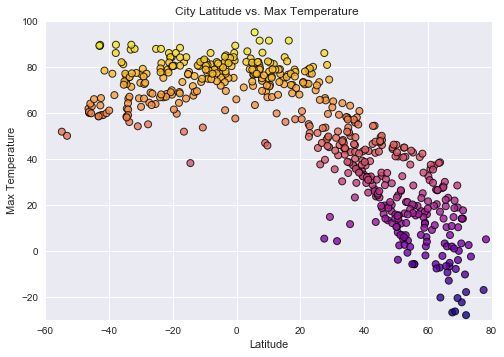

In [41]:
plt.scatter(new_cities_df["Latitude"], 
            new_cities_df["Temperature"], c=new_cities_df["Temperature"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Max Temperature ")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-30, 100])

# Save the figure
plt.savefig("Resources/Latitude_Temperature.png")

# Show plot
plt.show()


### Latitude vs. Humidity Plot

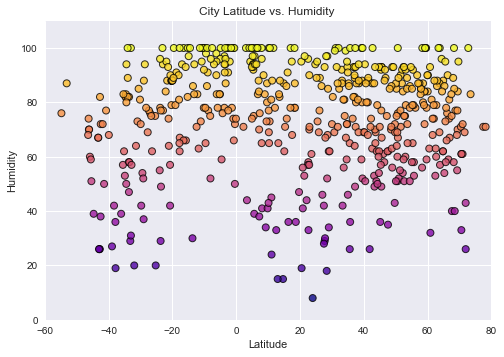

In [27]:
plt.scatter(new_cities_df["Latitude"], 
            new_cities_df["Humidity"], c=new_cities_df["Humidity"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Humidity ")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([0, 110])

# Save the figure
plt.savefig("Resources/Latitude_Humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

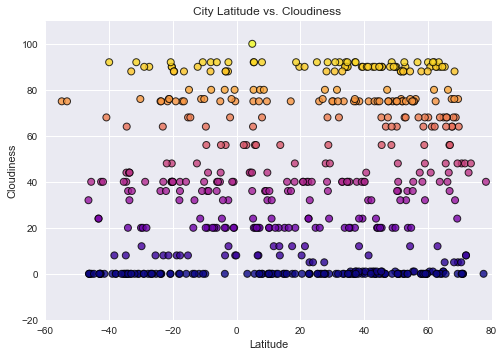

In [31]:
plt.scatter(new_cities_df["Latitude"], 
            new_cities_df["Cloudiness"], c=new_cities_df["Cloudiness"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Cloudiness ")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([-20, 110])

# Save the figure
plt.savefig("Resources/Latitude_Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

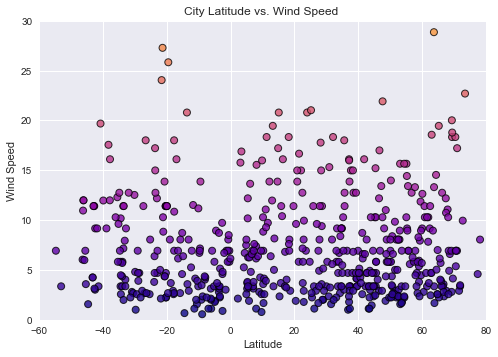

In [35]:
plt.scatter(new_cities_df["Latitude"], 
            new_cities_df["Wind Speed"], c=new_cities_df["Wind Speed"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=0.8, label="City")

# Incorporate the other graph properties
plt.style.use('seaborn')
plt.title(f"City Latitude vs. Wind Speed ")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-60, 80])
plt.ylim([0, 30])

# Save the figure
plt.savefig("Resources/Latitude_Wind Speed.png")

# Show plot
plt.show()